# Import Libraries

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

# Load Data

In [26]:
df = pd.read_csv("./Churn-Prediction-Data/new_churn_data.csv")

In [27]:
df.head()

,userid,churn,age,rent_or_own,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,...,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,zodiac_sign,un_linked_account,re_linked_account,cash_back_engagement,has_referred
0,0,1,22.0,na,0,0,0,0,0,48,...,Weekly,0,0,0,0,Taurus,0,0,0.57,0
1,7,1,25.0,R,0,0,5,0,0,5,...,Weekly,0,0,0,0,Gemini,0,0,0.07,0
2,8,1,32.0,na,0,0,0,0,0,49,...,Bi-Weekly,0,0,0,0,Virgo,0,0,0.60,1
3,18,1,26.0,na,0,0,169,0,0,184,...,na,0,0,0,0,Leo,0,0,1.77,1
4,19,1,28.0,R,0,0,11,0,0,65,...,na,0,0,0,0,Cancer,0,0,1.23,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 28 columns):
userid                         48079 non-null int64
churn                          48079 non-null int64
age                            48079 non-null float64
rent_or_own                    48079 non-null object
trivia_played                  48079 non-null int64
trivia_shared_results          48079 non-null int64
trivia_view_unlocked           48079 non-null int64
trivia_view_results            48079 non-null int64
cards_share                    48079 non-null int64
cards_viewed                   48079 non-null int64
cards_helpful                  48079 non-null int64
cards_not_helpful              48079 non-null int64
cards_clicked                  48079 non-null int64
has_used_mobile                48079 non-null int64
has_used_web                   48079 non-null int64
used_android                   48079 non-null int64
used_ios                       48079 non-null int64
more

# Exploratory Data Analysis and Data Visualization

In [29]:
for column in list(df):
    print('%s have %d uniques values'%(column,df[column].nunique()))

userid have 41389 uniques values
churn have 2 uniques values
age have 75 uniques values
rent_or_own have 3 uniques values
trivia_played have 65 uniques values
trivia_shared_results have 21 uniques values
trivia_view_unlocked have 324 uniques values
trivia_view_results have 62 uniques values
cards_share have 16 uniques values
cards_viewed have 328 uniques values
cards_helpful have 27 uniques values
cards_not_helpful have 12 uniques values
cards_clicked have 145 uniques values
has_used_mobile have 2 uniques values
has_used_web have 2 uniques values
used_android have 2 uniques values
used_ios have 2 uniques values
more_than_one_mobile_device have 5 uniques values
payfreq have 5 uniques values
loan_pending have 2 uniques values
withdrawn_application have 2 uniques values
paid_off_loan have 2 uniques values
did_not_accept_funding have 2 uniques values
zodiac_sign have 13 uniques values
un_linked_account have 2 uniques values
re_linked_account have 2 uniques values
cash_back_engagement have 

0    0.587304
1    0.412696
Name: churn, dtype: float64

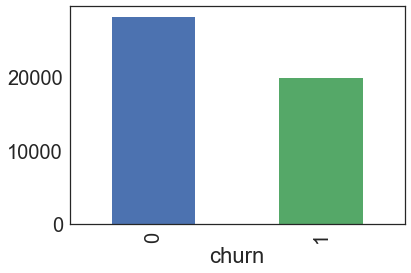

In [32]:
df.groupby('churn').size().plot(kind = "bar")
total= df.shape[0]
churnRate = df['churn'].value_counts()/total
churnRate

In [106]:
df.describe()

,userid,churn,age,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,...,used_android,more_than_one_mobile_device,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,un_linked_account,re_linked_account,cash_back_engagement,has_referred
count,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,...,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000
mean,35215.401714,0.412696,32.123588,3.307432,0.297261,28.090642,3.241020,0.076146,93.159903,0.059236,...,0.394517,0.420995,0.001310,0.019114,0.019094,0.004867,0.174629,0.018490,0.912191,0.316521
std,20152.252133,0.492324,9.886886,9.020670,0.993589,41.905861,8.860041,0.471277,88.887982,1.365405,...,0.488752,0.914631,0.036175,0.136928,0.136855,0.069595,0.379654,0.134718,0.748151,0.465123
min,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17810.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000
50%,35473.000000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000
75%,52787.000000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,163.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.530000,1.000000
max,69659.000000,1.000000,99.000000,72.000000,28.000000,1067.000000,61.000000,29.000000,598.000000,119.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


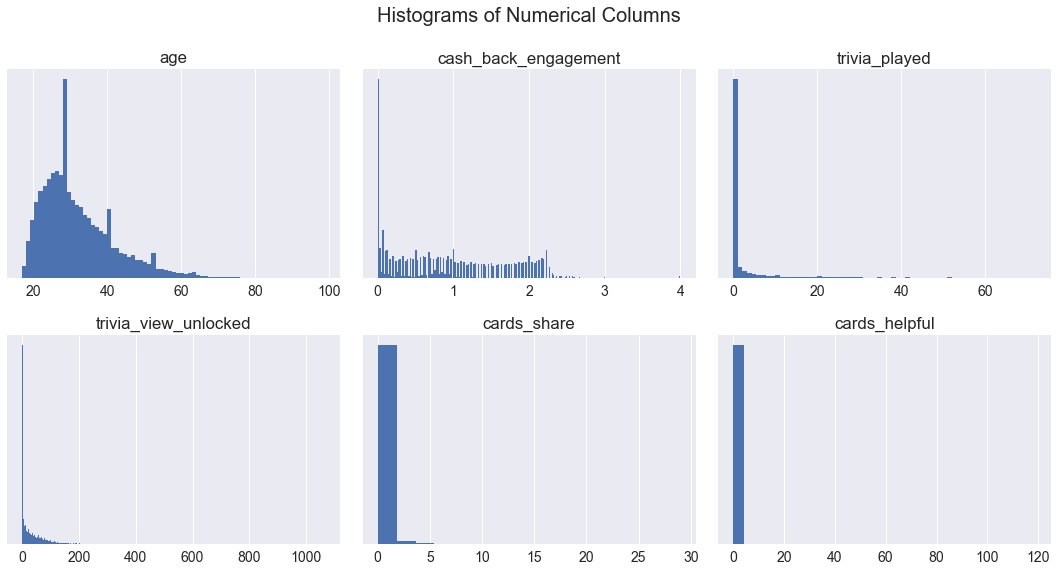

In [72]:
cols = ['age','cash_back_engagement','trivia_played','trivia_view_unlocked','cards_share','cards_helpful']
fig = plt.figure(figsize = (15,12))
plt.suptitle('Histograms of Numerical Columns',fontsize = 20)
for i,col in enumerate(cols):
    plt.subplot(3,3,i+1)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(col)
    vals = df[col].nunique()
    plt.hist(df[col],bins = vals)
plt.tight_layout(rect = [0,0.03,1,0.95])

([<matplotlib.patches.Wedge at 0x1a1e34b208>,
 [Text(-0.0522705,1.09876,'na'),
  Text(-0.211677,-1.07944,'R'),
  Text(1.06816,-0.262732,'O')],
 [Text(-0.0285112,0.599322,'51.51'),
  Text(-0.11546,-0.588786,'40.81'),
  Text(0.582634,-0.143308,'7.68')])

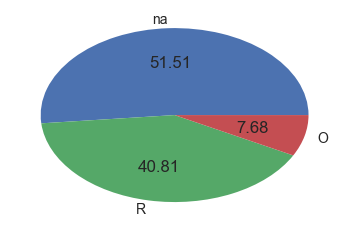

In [105]:
plt.pie(df['rent_or_own'].value_counts(normalize = True).values,labels = df['rent_or_own'].value_counts(normalize= True).index,autopct='%.2f')

has_used_mobile  churn
0                0         1012
                 1         1217
1                0        27225
                 1        18625
dtype: int64

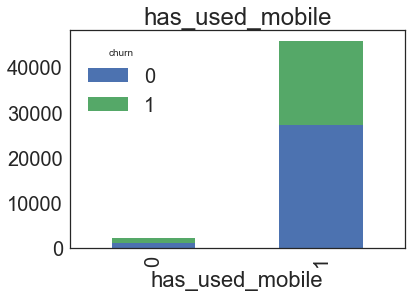

In [35]:
df[['has_used_mobile','churn']].groupby(['has_used_mobile','churn']).size().unstack().plot(kind = 'bar',stacked = True,title = 'has_used_mobile')
df[['has_used_mobile','churn']].groupby(['has_used_mobile','churn']).size()

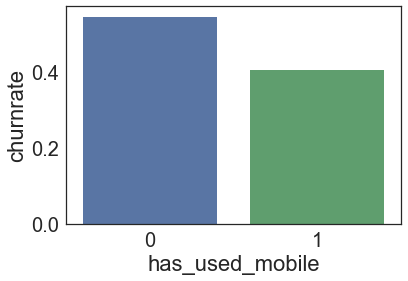

In [36]:
df_churn = df[df['churn']==1]
PeopleChurn = df_churn[['has_used_mobile','churn']].groupby('has_used_mobile',as_index=False).count()
PeopleChurn.rename(columns = {'churn':'peopleChurn'},inplace = True)
totalPeople =  df[['has_used_mobile','churn']].groupby('has_used_mobile',as_index=False).count()
churnrate = pd.merge(PeopleChurn,totalPeople,on ="has_used_mobile")
churnrate['churnrate'] = churnrate['peopleChurn']/churnrate['churn']
sns.barplot(y = 'churnrate', x = 'has_used_mobile',data =churnrate)

re_linked_account  churn
0                  0        27818
                   1        19372
1                  0          419
                   1          470
dtype: int64

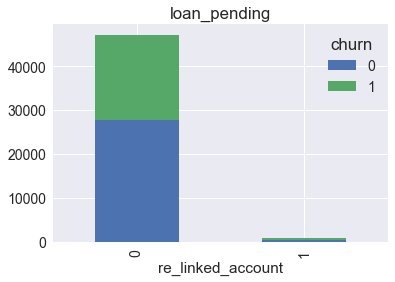

In [76]:
df[['re_linked_account','churn']].groupby(['re_linked_account','churn']).size().unstack().plot(kind = 'bar',stacked = True,title = 'loan_pending')
df[['re_linked_account','churn']].groupby(['re_linked_account','churn']).size()

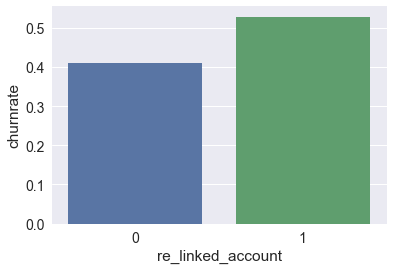

In [78]:

PeopleChurn = df_churn[['re_linked_account','churn']].groupby('re_linked_account',as_index=False).count()
PeopleChurn.rename(columns = {'churn':'peopleChurn'},inplace = True)
totalPeople =  df[['re_linked_account','churn']].groupby('re_linked_account',as_index=False).count()
churnrate = pd.merge(PeopleChurn,totalPeople,on ="re_linked_account")
churnrate['churnrate'] = churnrate['peopleChurn']/churnrate['churn']
sns.barplot(y = 'churnrate', x = 're_linked_account',data =churnrate)

# Correlation Plot

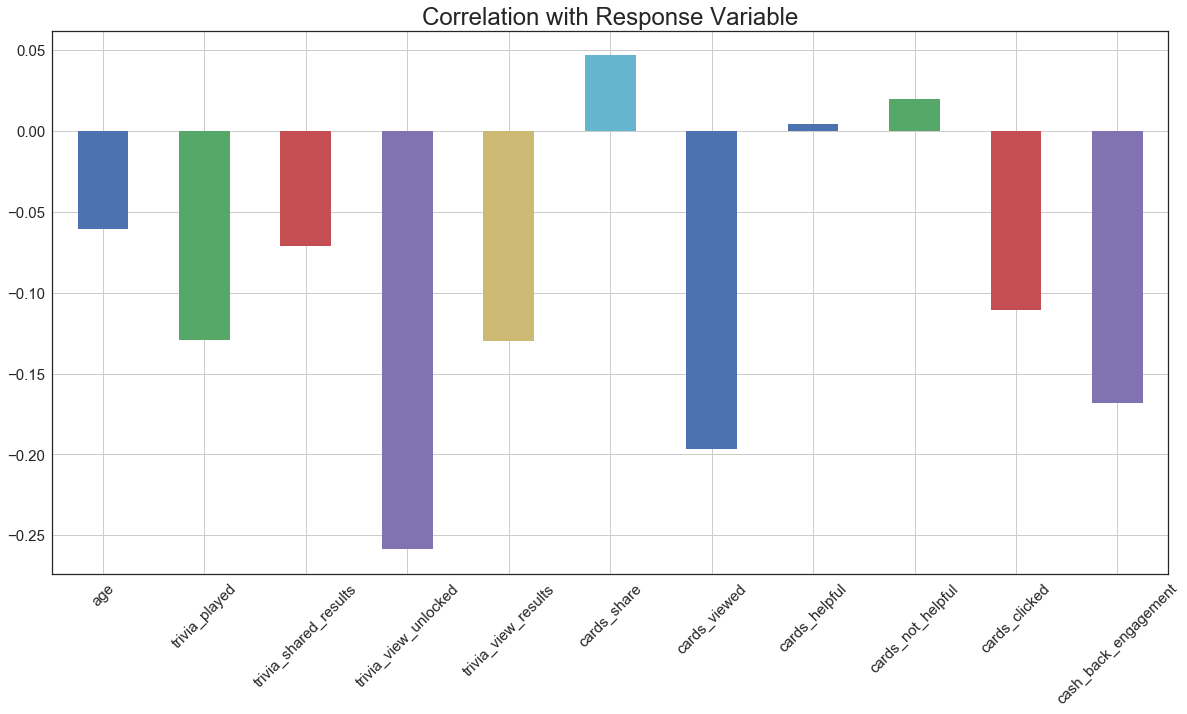

In [37]:
df.drop(['userid','churn']+catColumns,axis=1).corrwith(df['churn']).plot.bar(figsize = (20,10),title = 'Correlation with Response Variable',fontsize = 15, rot =45, grid =True)

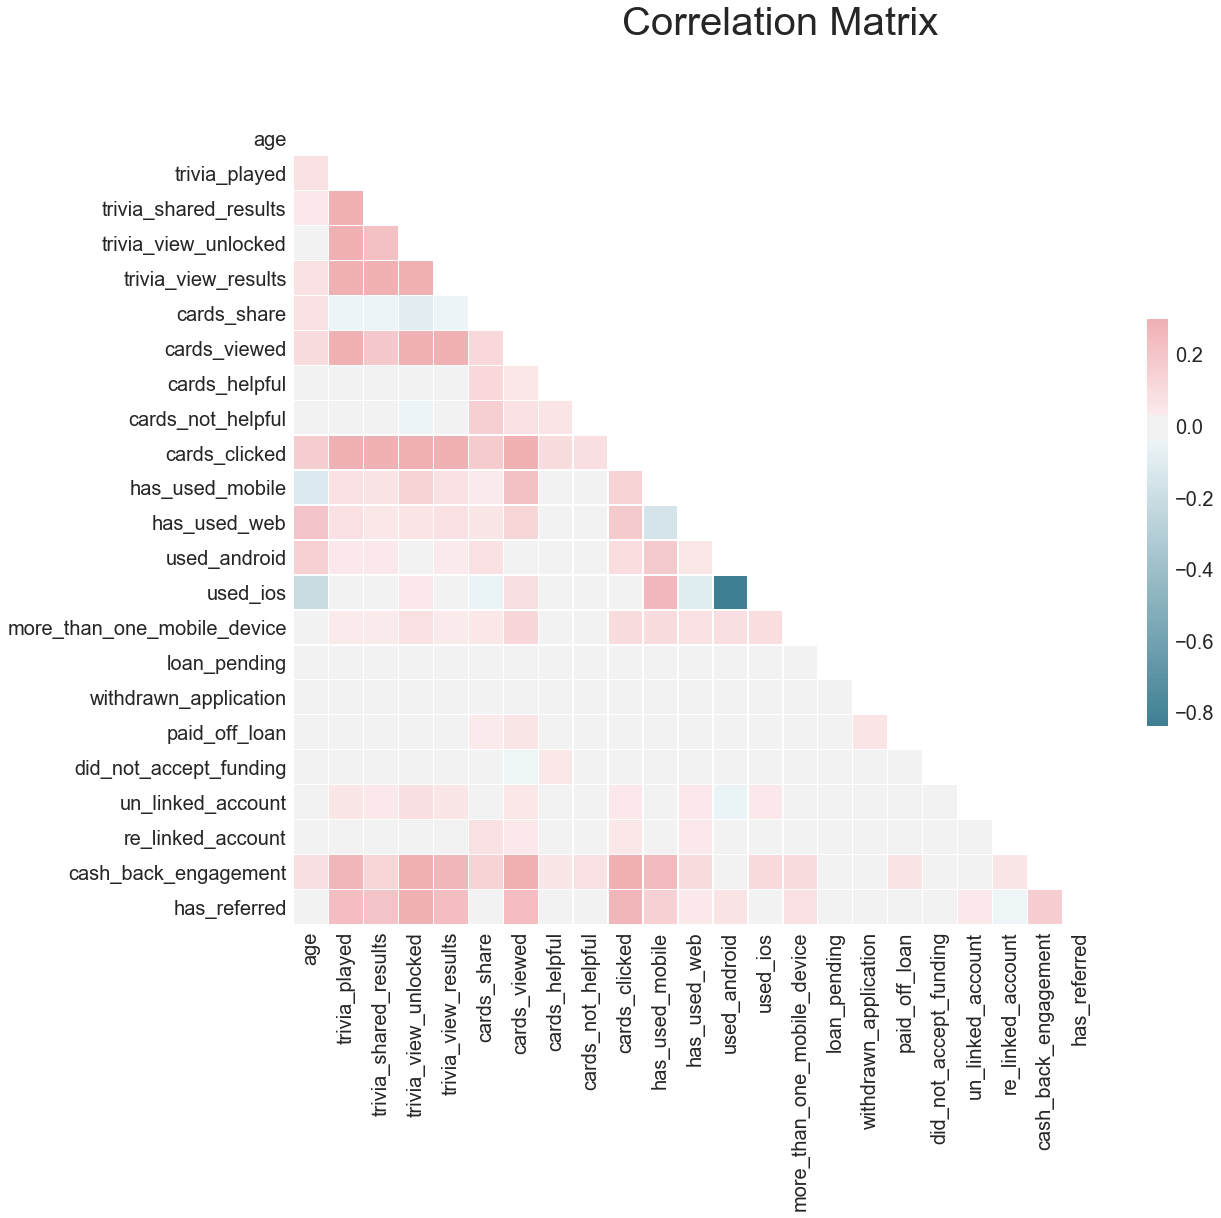

In [38]:
sns.set(style = 'white')
corr = df.drop(['userid','churn'],axis =1).corr()
sns.set(style = "white",font_scale =2)
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize = (18,15))
f.suptitle("Correlation Matrix",fontsize = 40)
cmap = sns.diverging_palette(220,10,as_cmap = True)


sns.heatmap(corr,mask = mask, cmap = cmap, vmax = 0.3, center = 0, square = True, linewidth = 0.5, cbar_kws = {'shrink':0.5})

In [39]:
df = df.drop('used_ios',axis=1)

# One hot Encoding

In [40]:
user_identifier = df['userid']
df_final = df.drop('userid',axis =1)

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 26 columns):
churn                          48079 non-null int64
age                            48079 non-null float64
rent_or_own                    48079 non-null object
trivia_played                  48079 non-null int64
trivia_shared_results          48079 non-null int64
trivia_view_unlocked           48079 non-null int64
trivia_view_results            48079 non-null int64
cards_share                    48079 non-null int64
cards_viewed                   48079 non-null int64
cards_helpful                  48079 non-null int64
cards_not_helpful              48079 non-null int64
cards_clicked                  48079 non-null int64
has_used_mobile                48079 non-null int64
has_used_web                   48079 non-null int64
used_android                   48079 non-null int64
more_than_one_mobile_device    48079 non-null int64
payfreq                        48079 non-null object
loa

In [82]:
df_final['rent_or_own'].value_counts()

na    24767
R     19621
O      3691
Name: rent_or_own, dtype: int64

In [43]:
df_final.columns

Index(['churn', 'age', 'rent_or_own', 'trivia_played', 'trivia_shared_results',
       'trivia_view_unlocked', 'trivia_view_results', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android',
       'more_than_one_mobile_device', 'payfreq', 'loan_pending',
       'withdrawn_application', 'paid_off_loan', 'did_not_accept_funding',
       'zodiac_sign', 'un_linked_account', 're_linked_account',
       'cash_back_engagement', 'has_referred'],
      dtype='object')

In [45]:
df_final = pd.get_dummies(df_final)
df_final.columns

Index(['churn', 'age', 'trivia_played', 'trivia_shared_results',
       'trivia_view_unlocked', 'trivia_view_results', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android',
       'more_than_one_mobile_device', 'loan_pending', 'withdrawn_application',
       'paid_off_loan', 'did_not_accept_funding', 'un_linked_account',
       're_linked_account', 'cash_back_engagement', 'has_referred',
       'rent_or_own_O', 'rent_or_own_R', 'rent_or_own_na', 'payfreq_Bi-Weekly',
       'payfreq_Monthly', 'payfreq_Semi-Monthly', 'payfreq_Weekly',
       'payfreq_na', 'zodiac_sign_Aquarius', 'zodiac_sign_Aries',
       'zodiac_sign_Cancer', 'zodiac_sign_Capricorn', 'zodiac_sign_Gemini',
       'zodiac_sign_Leo', 'zodiac_sign_Libra', 'zodiac_sign_Pisces',
       'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio', 'zodiac_sign_Taurus',
       'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [46]:
# To avoid the correlation introduced in one-hot Encoding
df_final = df_final.drop(['rent_or_own_na','zodiac_sign_na','payfreq_na'],axis =1)
#df_final.columns

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df_final.drop('churn',axis =1),df_final['churn'],test_size = 0.2, random_state= 0)

In [49]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test =X_test2
X_train.head()

,age,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
14025,-0.719513,-0.367782,-0.300778,-0.669278,-0.366962,-0.166039,-1.028514,-0.042757,-0.067732,-0.661640,...,-0.31014,6.223705,-0.293212,-0.311096,-0.299029,-0.293839,-0.287527,-0.2908,-0.294413,-0.309686
2480,0.092140,-0.367782,-0.300778,-0.502734,-0.366962,-0.166039,-0.622575,-0.042757,-0.067732,-0.580744,...,-0.31014,-0.160676,-0.293212,-0.311096,-0.299029,-0.293839,-0.287527,-0.2908,-0.294413,-0.309686
16315,-0.618056,-0.367782,-0.300778,-0.645486,-0.366962,-0.166039,-0.994686,-0.042757,-0.067732,-0.661640,...,-0.31014,-0.160676,-0.293212,3.214443,-0.299029,-0.293839,-0.287527,-0.2908,-0.294413,-0.309686
30366,-1.226796,-0.367782,-0.300778,-0.574110,-0.366962,-0.166039,-0.216635,-0.042757,-0.067732,-0.499849,...,-0.31014,-0.160676,-0.293212,-0.311096,-0.299029,-0.293839,-0.287527,-0.2908,-0.294413,-0.309686
19581,2.527100,-0.367782,-0.300778,-0.645486,-0.366962,-0.166039,-1.051067,-0.042757,-0.067732,-0.661640,...,-0.31014,-0.160676,-0.293212,-0.311096,-0.299029,-0.293839,3.477933,-0.2908,-0.294413,-0.309686


## LogisticRegression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)
y_prediction = lr.predict(X_test)
print('Logistic Regression \n AUC:%f\n' %roc_auc_score(y_test,y_prediction))
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_prediction))
print("Test Data precision: %0.4f" % precision_score(y_test, y_prediction))
print("Test Data f1_score: %0.4f" % f1_score(y_test, y_prediction))



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression 
 AUC:0.625288

Test Data Accuracy: 0.6502
Test Data precision: 0.5991
Test Data f1_score: 0.5317


# SVM

In [91]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_prediction = svc.predict(X_test)
print('SVC \n')
print('AUC:%f\n' %roc_auc_score(y_test,y_prediction))
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_prediction))
print("Test Data precision: %0.4f" % precision_score(y_test, y_prediction))
print("Test Data f1_score: %0.4f" % f1_score(y_test, y_prediction))


SVC 

AUC:0.651436

Test Data Accuracy: 0.6735
Test Data precision: 0.6294
Test Data f1_score: 0.5701


## svc parameter tuning

In [94]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [95]:
grid.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.597, total= 1.4min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.597, total= 1.7min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.597, total= 1.5min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.6min remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.631, total= 1.2min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.619, total= 1.1min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.632, total= 1.0min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.592, total=  59.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.595, total= 1.1min
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.592, total= 1.1min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.657, total= 2.1min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 50.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [96]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [97]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
grid_predictions = grid.predict(X_test)
print('SVC \n')
print('AUC:%f\n' %roc_auc_score(y_test,y_prediction))
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_prediction))
print("Test Data precision: %0.4f" % precision_score(y_test, y_prediction))
print("Test Data f1_score: %0.4f" % f1_score(y_test, y_prediction))

SVC 

AUC:0.651436

Test Data Accuracy: 0.6735
Test Data precision: 0.6294
Test Data f1_score: 0.5701


# Gradient Boosting Tree

In [51]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_metric = 'auc',eval_set = [(X_test,y_test)])
y_prediction = xgb.predict(X_test)

[0]	validation_0-auc:0.701135
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.701916
[2]	validation_0-auc:0.706967
[3]	validation_0-auc:0.710703
[4]	validation_0-auc:0.71161
[5]	validation_0-auc:0.713078
[6]	validation_0-auc:0.71275
[7]	validation_0-auc:0.718892
[8]	validation_0-auc:0.720059
[9]	validation_0-auc:0.720507
[10]	validation_0-auc:0.72162
[11]	validation_0-auc:0.723429
[12]	validation_0-auc:0.724044
[13]	validation_0-auc:0.725011
[14]	validation_0-auc:0.725212
[15]	validation_0-auc:0.726048
[16]	validation_0-auc:0.726839
[17]	validation_0-auc:0.727294
[18]	validation_0-auc:0.728263
[19]	validation_0-auc:0.728401
[20]	validation_0-auc:0.729418
[21]	validation_0-auc:0.729667
[22]	validation_0-auc:0.730081
[23]	validation_0-auc:0.73009
[24]	validation_0-auc:0.730269
[25]	validation_0-auc:0.731079
[26]	validation_0-auc:0.731481
[27]	validation_0-auc:0.732049
[28]	validation_0-auc:0.7327
[29]	validation_0-auc:0.733223
[30]	validation_0-auc:

xgboost 
 Test Data Accuracy: 0.6958
Test Data precision: 0.6619
Test Data f1_score: 0.5995


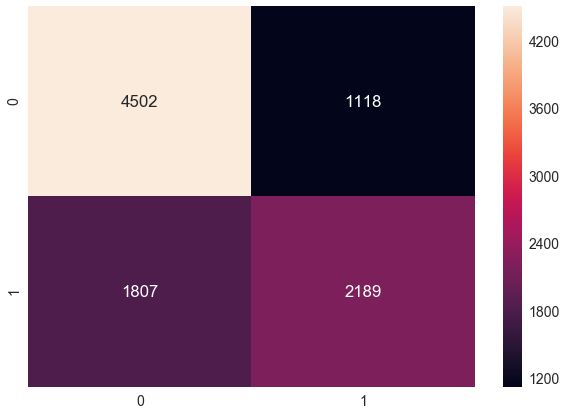

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_prediction)
accuracy_score(y_test, y_prediction)
precision_score(y_test, y_prediction) # tp / (tp + fp)
recall_score(y_test, y_prediction) # tp / (tp + fn)
f1_score(y_test, y_prediction)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

print("xgboost \n Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_prediction))
print("Test Data precision: %0.4f" % precision_score(y_test, y_prediction))
print("Test Data f1_score: %0.4f" % f1_score(y_test, y_prediction))

In [53]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = xgb,X= X_train, y=y_train,cv =10, verbose =4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.686, total=   3.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] .................................... , score=0.688, total=   3.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] .................................... , score=0.699, total=   3.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s remaining:    0.0s


[CV] .................................... , score=0.696, total=   3.1s
[CV]  ................................................................
[CV] .................................... , score=0.698, total=   3.1s
[CV]  ................................................................
[CV] .................................... , score=0.690, total=   3.3s
[CV]  ................................................................
[CV] .................................... , score=0.697, total=   3.1s
[CV]  ................................................................
[CV] .................................... , score=0.701, total=   3.0s
[CV]  ................................................................
[CV] .................................... , score=0.696, total=   3.3s
[CV]  ................................................................
[CV] .................................... , score=0.696, total=   3.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   31.7s finished


In [54]:
accuracies. mean()

0.6945641482607805

In [55]:
accuracies.std()

0.0047282372233120795

# Feature Selection

In [56]:
from sklearn.feature_selection import RFE
xgb = XGBClassifier()
rfe = RFE(xgb,20)
rfe = rfe.fit(X_train,y_train)

In [121]:
print(rfe.support_)

[ True False  True  True False False  True False  True  True False  True
  True False  True False  True  True  True  True False  True  True False
 False  True False False  True  True False False False False False False
  True False False False  True]


In [125]:
X_train.columns[rfe.support_]

Index(['age', 'trivia_shared_results', 'trivia_view_unlocked', 'cards_viewed',
       'cards_not_helpful', 'cards_clicked', 'has_used_web', 'used_android',
       'more_than_one_mobile_device', 'withdrawn_application', 'paid_off_loan',
       'did_not_accept_funding', 'un_linked_account', 'cash_back_engagement',
       'has_referred', 'payfreq_Bi-Weekly', 'payfreq_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Pisces', 'zodiac_sign_Virgo'],
      dtype='object')

In [101]:
X_train,X_test,y_train,y_test = train_test_split(df_final.drop('churn',axis =1),df_final['churn'],test_size = 0.2, random_state= 0)

In [103]:
xgb = XGBClassifier()
xgb.fit(X_train[X_train.columns[rfe.support_]],y_train,early_stopping_rounds=10,eval_metric = 'auc',eval_set = [(X_test[X_train.columns[rfe.support_]],y_test)])
y_prediction = xgb.predict(X_test[X_train.columns[rfe.support_]])

[0]	validation_0-auc:0.70396
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.704415
[2]	validation_0-auc:0.708786
[3]	validation_0-auc:0.712557
[4]	validation_0-auc:0.713377
[5]	validation_0-auc:0.714874
[6]	validation_0-auc:0.719081
[7]	validation_0-auc:0.722025
[8]	validation_0-auc:0.7228
[9]	validation_0-auc:0.723072
[10]	validation_0-auc:0.723808
[11]	validation_0-auc:0.725764
[12]	validation_0-auc:0.726741
[13]	validation_0-auc:0.727591
[14]	validation_0-auc:0.727611
[15]	validation_0-auc:0.728302
[16]	validation_0-auc:0.729306
[17]	validation_0-auc:0.730562
[18]	validation_0-auc:0.731531
[19]	validation_0-auc:0.732377
[20]	validation_0-auc:0.733267
[21]	validation_0-auc:0.733714
[22]	validation_0-auc:0.734287
[23]	validation_0-auc:0.734926
[24]	validation_0-auc:0.735072
[25]	validation_0-auc:0.735896
[26]	validation_0-auc:0.736207
[27]	validation_0-auc:0.736972
[28]	validation_0-auc:0.737666
[29]	validation_0-auc:0.738164
[30]	validation_0-a

xgboost 
 Test Data Accuracy: 0.6996
Test Data precision: 0.6718
Test Data f1_score: 0.5997


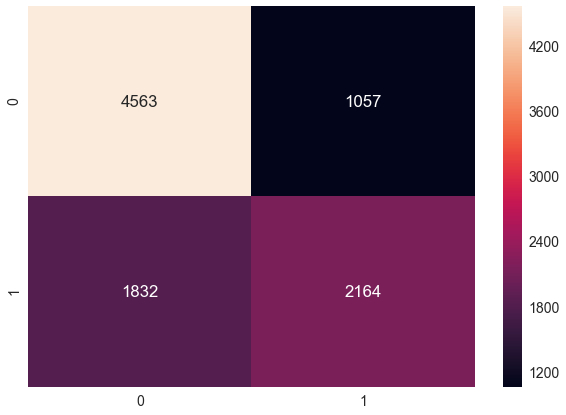

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_prediction)
accuracy_score(y_test, y_prediction)
precision_score(y_test, y_prediction) # tp / (tp + fp)
recall_score(y_test, y_prediction) # tp / (tp + fn)
f1_score(y_test, y_prediction)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

print("xgboost \n Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_prediction))
print("Test Data precision: %0.4f" % precision_score(y_test, y_prediction))
print("Test Data f1_score: %0.4f" % f1_score(y_test, y_prediction))